In [179]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.geocoders import Nominatim
import geopandas as gpd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## Importation des données :

On cherche à fusionner tout les fichier qu'on a dans le fichier transactions-er en un seul fichier afain d'avoir le maximum de données possible.

In [192]:
folder = '/home/hiba/projet/transactions-ser'
csv_files = [f for f in os.listdir(folder) if f.endswith('.csv')]
df = pd.read_csv(os.path.join(folder, csv_files[0]),delimiter=';')
common_columns = list(df.columns)

In [193]:
for file in csv_files[1:]:
    df_temp = pd.read_csv(os.path.join(folder, file), delimiter=';')
    # Keep only the columns that are present in the first CSV file
    df_temp = df_temp[common_columns]
    df = df.append(df_temp, ignore_index=False)
df.to_csv('merged.csv')

/tmp/ipykernel_9111/3742714939.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp, ignore_index=False)
/tmp/ipykernel_9111/3742714939.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp, ignore_index=False)
/tmp/ipykernel_9111/3742714939.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp, ignore_index=False)
/tmp/ipykernel_9111/3742714939.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp, ignore_index=False)
/tmp/ipykernel_9111/3742714939.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future ve

In [194]:
df = df.replace({'None': None, 'nan': float('nan')})
df

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,...,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude,section_prefixe
0,2022-359835,2022-03-18,1,Vente,115000.0,9001.0,None,IMMEUBLE ATLANTIDE,A651,76800,...,110.0,6.0,None,None,None,None,NaN,1.071577,49.393501,000BS
1,2022-359835,2022-03-18,1,Vente,115000.0,9001.0,None,IMMEUBLE ATLANTIDE,A651,76800,...,NaN,0.0,None,None,None,None,NaN,1.071577,49.393501,000BS
2,2022-359041,2022-01-18,1,Vente,181300.0,4.0,None,ALL DU CLOS MAJORELLE,0517,76800,...,83.0,4.0,S,sols,None,None,97.0,1.068890,49.391763,000BS
3,2022-359041,2022-01-18,1,Vente,181300.0,4.0,None,ALL DU CLOS MAJORELLE,0517,76800,...,NaN,0.0,S,sols,None,None,12.0,1.068805,49.391922,000BS
4,2022-359041,2022-01-18,1,Vente,181300.0,1.0,None,ALL DU CLOS MAJORELLE,0517,76800,...,NaN,0.0,S,sols,None,None,13.0,1.068709,49.392102,000BS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,2017-545059,2017-10-25,1,Vente,170000.0,171.0,None,RUE DE PARIS,1840,76800,...,140.0,6.0,S,sols,None,None,727.0,1.106699,49.388487,000BD
90,2017-544418,2017-09-26,1,Vente,174000.0,19.0,None,RUE DE LA REPUBLIQUE,2180,76800,...,57.0,4.0,S,sols,None,None,448.0,1.105192,49.389305,000BD
91,2017-544418,2017-09-26,1,Vente,174000.0,15.0,None,RUE DE LA REPUBLIQUE,2180,76800,...,NaN,NaN,S,sols,None,None,220.0,1.104911,49.389243,000BD
92,2017-543711,2017-08-07,1,Vente,250000.0,145.0,None,RUE DE PARIS,1840,76800,...,153.0,5.0,J,jardins,POTAG,Jardin potager,685.0,1.106324,49.389849,000BD


On a donc un dataFrame de 2972 lignes et 41 colonnes.

### Nettoyage du dataFrame

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2972 entries, 0 to 93
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id_mutation                   2972 non-null   object 
 1   date_mutation                 2972 non-null   object 
 2   numero_disposition            2972 non-null   int64  
 3   nature_mutation               2972 non-null   object 
 4   valeur_fonciere               2922 non-null   float64
 5   adresse_numero                2487 non-null   float64
 6   adresse_suffixe               117 non-null    object 
 7   adresse_nom_voie              2957 non-null   object 
 8   adresse_code_voie             2957 non-null   object 
 9   code_postal                   2957 non-null   object 
 10  code_commune                  2972 non-null   int64  
 11  nom_commune                   2972 non-null   object 
 12  code_departement              2972 non-null   int64  
 13  ancie

On remarque la présence de beaucoup de valeurs nulls. On commence d'abord par supprimer les valeurs nulls des colonnes qui nous interessent le plus : valeur_foncier et surface_reelle_bati, puis on va remplacer les valeurs manquantes de surface_terrain avec 0

In [196]:
df.dropna(subset = ["valeur_fonciere"], inplace = True)
df.dropna(subset = ["surface_reelle_bati"], inplace = True)
df['surface_terrain'] = df['surface_terrain'].fillna(0)
df.isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1613 entries, 0 to 93
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id_mutation                   1613 non-null   object 
 1   date_mutation                 1613 non-null   object 
 2   numero_disposition            1613 non-null   int64  
 3   nature_mutation               1613 non-null   object 
 4   valeur_fonciere               1613 non-null   float64
 5   adresse_numero                1611 non-null   float64
 6   adresse_suffixe               67 non-null     object 
 7   adresse_nom_voie              1613 non-null   object 
 8   adresse_code_voie             1613 non-null   object 
 9   code_postal                   1613 non-null   object 
 10  code_commune                  1613 non-null   int64  
 11  nom_commune                   1613 non-null   object 
 12  code_departement              1613 non-null   int64  
 13  ancie

Vu qu'on s'intéresse qu'aux maisons et aux appratements, on va supprimer les autres valeurs sur la colonne "type_local" et on garde que les maisons et les appartement.

In [197]:
df = df.loc[(df['type_local'] == 'Maison') | (df['type_local'] == 'Appartement')]

Ensuite, on converti la colonne du code_type_local en entier, afin de faciliter les manipulations.

In [198]:
df['code_type_local'] = pd.to_numeric(df['code_type_local'], errors='coerce', downcast='integer')

/tmp/ipykernel_9111/1635837497.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['code_type_local'] = pd.to_numeric(df['code_type_local'], errors='coerce', downcast='integer')


On va aussi supprimer les ventes de lots qui sont suppérieur à 1n ainsi que les valeurs qui ne sount pas cohérente : si la surface carrez est suppérieur à la surface bati, c'est une erreur.

In [199]:
df = df.drop(df.loc[df["nombre_lots"]> 1].index)
df.groupby("nombre_lots")[['valeur_fonciere']].count().sort_values("nombre_lots")
df = df.drop(df.loc[df["lot1_surface_carrez"] > df["surface_reelle_bati"]].index)

On ajoute une nouvelle colonne "surface", qui prend la surface bati si c'est une maison ou la surface du lot carrez si c'est un appartement

In [200]:
df['surface'] = np.where(df["code_type_local"] == 1, df["surface_reelle_bati"],df["lot1_surface_carrez"])
df.dropna(subset = ["surface"], inplace = True)

On supprime les colonnes qui ont plus de 10% de données manquantes

In [201]:
df = df.dropna(thresh=len(df) * 0.10, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 73
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_mutation                394 non-null    object 
 1   date_mutation              394 non-null    object 
 2   numero_disposition         394 non-null    int64  
 3   nature_mutation            394 non-null    object 
 4   valeur_fonciere            394 non-null    float64
 5   adresse_numero             394 non-null    float64
 6   adresse_nom_voie           394 non-null    object 
 7   adresse_code_voie          394 non-null    object 
 8   code_postal                394 non-null    object 
 9   code_commune               394 non-null    int64  
 10  nom_commune                394 non-null    object 
 11  code_departement           394 non-null    int64  
 12  id_parcelle                394 non-null    object 
 13  nombre_lots                394 non-null    int64  


In [202]:
df = df.drop(['id_mutation','nature_mutation' , 'adresse_numero','adresse_nom_voie' ,'adresse_code_voie','code_postal', 'nom_commune','code_departement', 'id_parcelle', 'date_mutation','numero_disposition','code_nature_culture','nature_culture'], axis=1)

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 73
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   valeur_fonciere            394 non-null    float64
 1   code_commune               394 non-null    int64  
 2   nombre_lots                394 non-null    int64  
 3   code_type_local            394 non-null    int8   
 4   type_local                 394 non-null    object 
 5   surface_reelle_bati        394 non-null    float64
 6   nombre_pieces_principales  394 non-null    float64
 7   surface_terrain            394 non-null    float64
 8   longitude                  394 non-null    float64
 9   latitude                   394 non-null    float64
 10  section_prefixe            394 non-null    object 
 11  surface                    394 non-null    float64
dtypes: float64(7), int64(2), int8(1), object(2)
memory usage: 37.3+ KB


In [204]:
df

,valeur_fonciere,code_commune,nombre_lots,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,surface_terrain,longitude,latitude,section_prefixe,surface
0,115000.0,76575,1,2,Appartement,110.0,6.0,0.0,1.071577,49.393501,000BS,103.35
16,73000.0,76575,1,2,Appartement,100.0,5.0,0.0,1.071577,49.393501,000BS,94.23
21,375000.0,76575,0,1,Maison,129.0,4.0,1765.0,1.062906,49.390630,000BS,129.00
24,275000.0,76575,0,1,Maison,143.0,6.0,187.0,1.065427,49.390566,000BS,143.00
38,137000.0,76575,0,1,Maison,63.0,4.0,581.0,1.061040,49.392848,000BS,63.00
...,...,...,...,...,...,...,...,...,...,...,...,...
38,175000.0,76575,0,1,Maison,87.0,3.0,861.0,1.106560,49.388892,000BD,87.00
43,93000.0,76575,0,1,Maison,83.0,4.0,133.0,1.105306,49.388171,000BD,83.00
55,90000.0,76575,0,1,Maison,58.0,3.0,58.0,1.105265,49.387870,000BD,58.00
71,91000.0,76575,0,1,Maison,54.0,3.0,43.0,1.105094,49.387773,000BD,54.00


détection d'outliers :

In [205]:
s = (df.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

s = (df.dtypes == 'int')
int_cols = list(s[s].index)
print("Integer variables:")
print(int_cols)

s = (df.dtypes == 'float')
float_cols = list(s[s].index)
print("Real variables:")
print(float_cols)

Categorical variables:
['type_local', 'section_prefixe']
Integer variables:
['code_commune', 'nombre_lots']
Real variables:
['valeur_fonciere', 'surface_reelle_bati', 'nombre_pieces_principales', 'surface_terrain', 'longitude', 'latitude', 'surface']


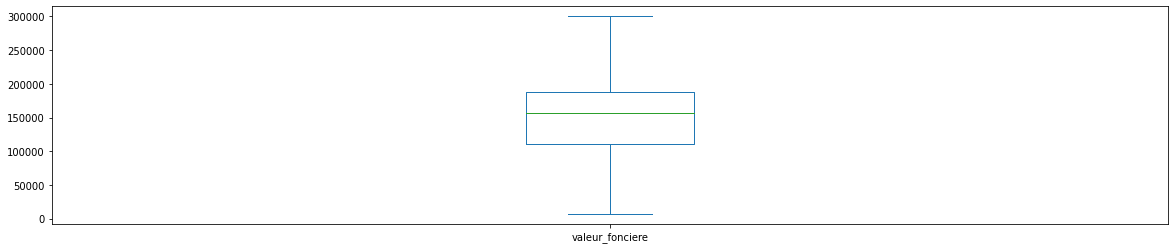

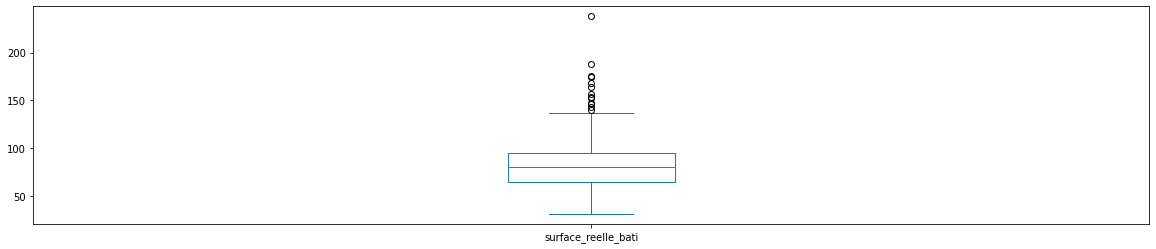

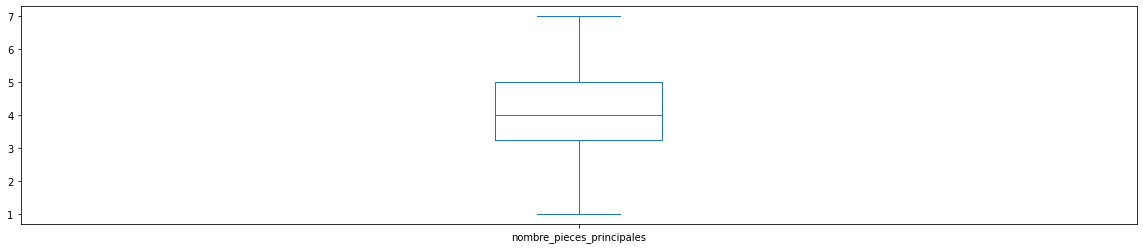

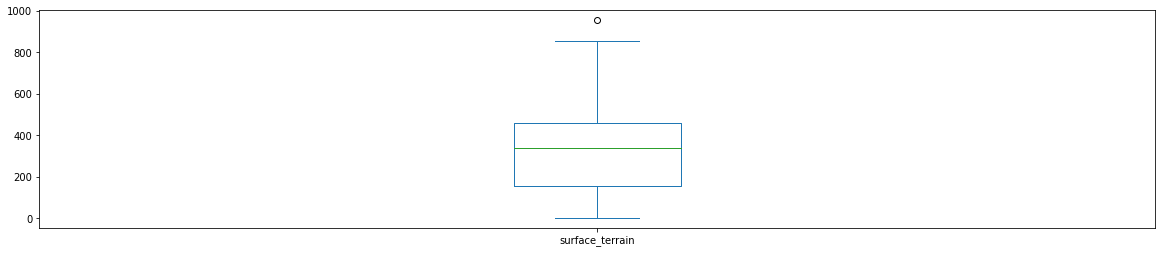

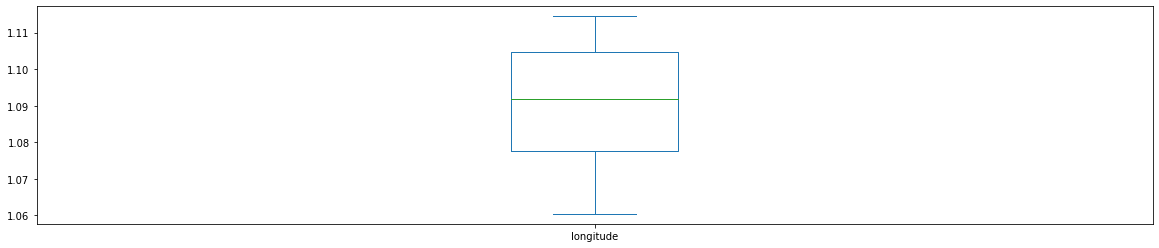

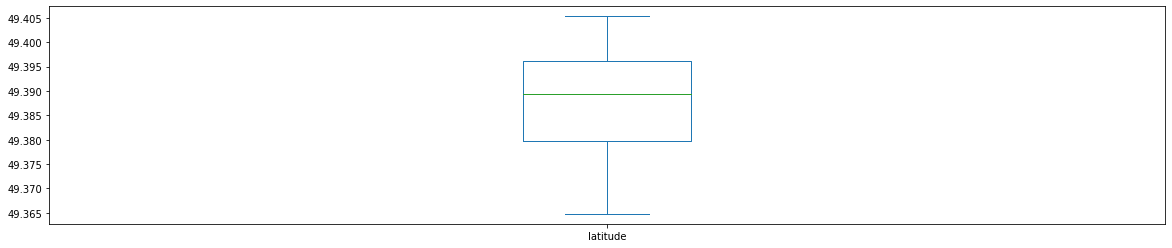

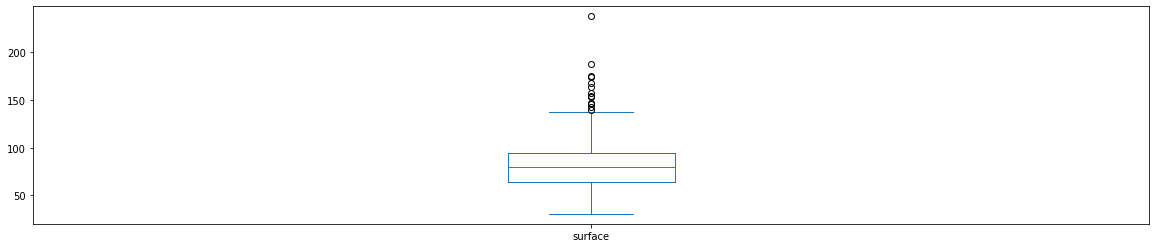

In [209]:
for l in float_cols :
    df[[l]].plot.box(figsize=(20, 4))
    plt.show()

In [210]:
largest_st = df['surface_terrain'].nlargest(len(df[df['surface_terrain'] > 1000]))
df = df.drop(largest_st.index)
largest_vf = df['valeur_fonciere'].nlargest(len(df[df['valeur_fonciere'] > 300000]))
df = df.drop(largest_vf.index)
largest_vf = df['surface'].nlargest(len(df[df['surface'] > 150]))
df = df.drop(largest_vf.index)
largest_vf = df['surface_reelle_bati'].nlargest(len(df[df['surface_reelle_bati'] > 150]))
df = df.drop(largest_vf.index) 

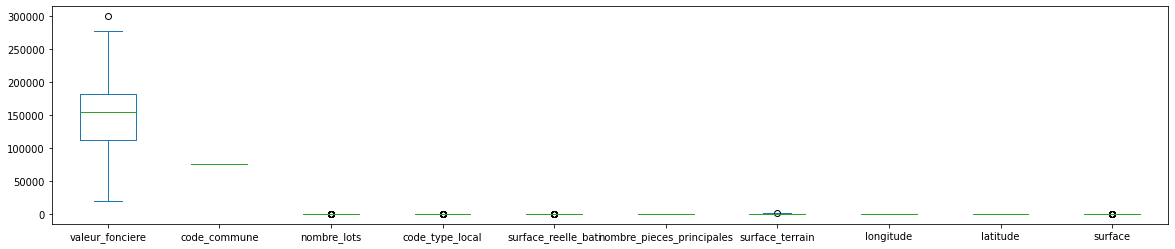

In [211]:
df.plot.box(figsize=(20, 4))

# Show the plot
plt.show()

In [214]:
"""df['nombre_pieces_principales'].plot.box(figsize=(20, 4))

# Show the plot
plt.show()"""

"df['nombre_pieces_principales'].plot.box(figsize=(20, 4))\n\n# Show the plot\nplt.show()"

In [215]:
"""largest_sb = df['surface_reelle_bati'].nlargest(len(df[df['surface_reelle_bati'] > 120]))
df = df.drop(largest_sb.index)
df['surface_reelle_bati'].plot.box(figsize=(20, 4))

# Show the plot
plt.show()"""

"largest_sb = df['surface_reelle_bati'].nlargest(len(df[df['surface_reelle_bati'] > 120]))\ndf = df.drop(largest_sb.index)\ndf['surface_reelle_bati'].plot.box(figsize=(20, 4))\n\n# Show the plot\nplt.show()"

In [216]:
"""largest_st = df['surface_terrain'].nlargest(5) #5
df = df.drop(largest_st.index)

df['surface_terrain'].plot.box(figsize=(20, 4))

# Show the plot
plt.show()"""

"largest_st = df['surface_terrain'].nlargest(5) #5\ndf = df.drop(largest_st.index)\n\ndf['surface_terrain'].plot.box(figsize=(20, 4))\n\n# Show the plot\nplt.show()"

In [217]:
df

,valeur_fonciere,code_commune,nombre_lots,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,surface_terrain,longitude,latitude,section_prefixe,surface
16,73000.0,76575,1,2,Appartement,100.0,5.0,0.0,1.071577,49.393501,000BS,94.23
62,96500.0,76575,1,2,Appartement,64.0,4.0,0.0,1.060400,49.392643,000BS,63.43
71,200000.0,76575,0,1,Maison,86.0,4.0,417.0,1.063211,49.392964,000BS,86.00
110,112000.0,76575,0,1,Maison,63.0,4.0,263.0,1.061100,49.394313,000BS,63.00
117,69000.0,76575,1,2,Appartement,31.0,1.0,0.0,1.071577,49.393501,000BS,30.44
...,...,...,...,...,...,...,...,...,...,...,...,...
33,211550.0,76575,0,1,Maison,130.0,6.0,53.0,1.105048,49.389845,000BD,130.00
43,93000.0,76575,0,1,Maison,83.0,4.0,133.0,1.105306,49.388171,000BD,83.00
55,90000.0,76575,0,1,Maison,58.0,3.0,58.0,1.105265,49.387870,000BD,58.00
71,91000.0,76575,0,1,Maison,54.0,3.0,43.0,1.105094,49.387773,000BD,54.00


In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228 entries, 16 to 73
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   valeur_fonciere            228 non-null    float64
 1   code_commune               228 non-null    int64  
 2   nombre_lots                228 non-null    int64  
 3   code_type_local            228 non-null    int8   
 4   type_local                 228 non-null    object 
 5   surface_reelle_bati        228 non-null    float64
 6   nombre_pieces_principales  228 non-null    float64
 7   surface_terrain            228 non-null    float64
 8   longitude                  228 non-null    float64
 9   latitude                   228 non-null    float64
 10  section_prefixe            228 non-null    object 
 11  surface                    228 non-null    float64
dtypes: float64(7), int64(2), int8(1), object(2)
memory usage: 21.6+ KB


## Visualisation :

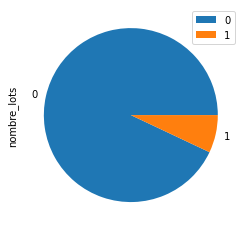

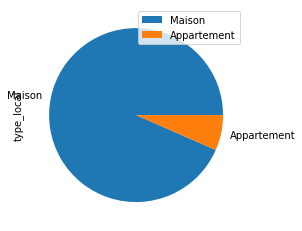

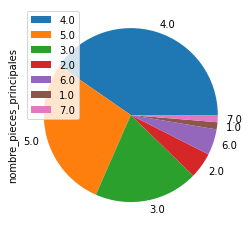

In [221]:
col = ['nombre_lots','type_local','nombre_pieces_principales']
for l in col :
    counts = df[[l]].apply(pd.value_counts)
    counts.plot.pie(subplots=True, figsize=(8, 4))
    plt.show()

In [466]:
df.to_csv('new_merged.csv')

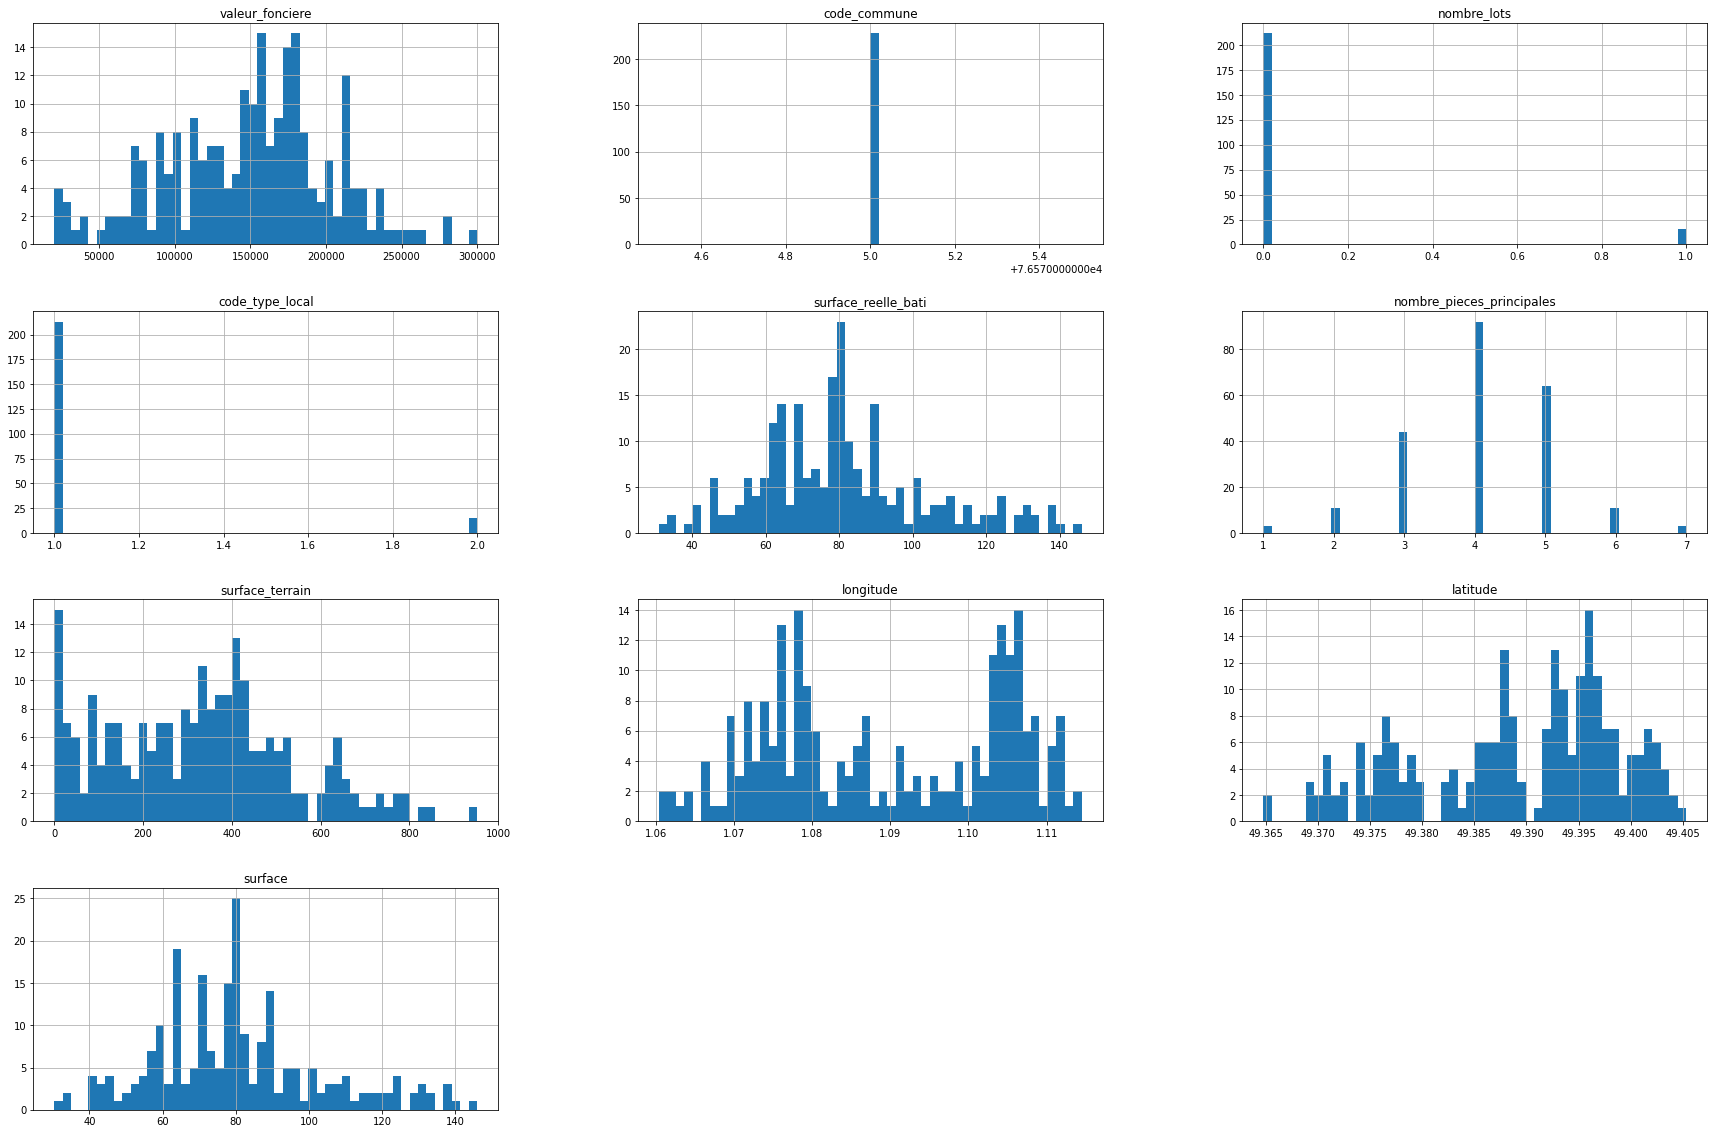

In [222]:
df.hist(bins=50, figsize=(30,20))
plt.show()
     

## Analyse exploratoire des données :
On essaie de trouver les valeurs qui influencent les prix :

<Figure size 144x576 with 0 Axes>

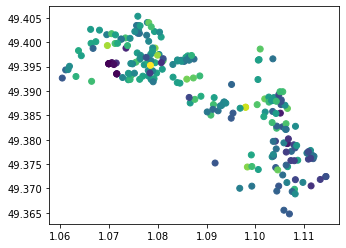

In [227]:
from shapely.geometry import Point

df['Coordinates'] = df.apply(lambda x: Point((x['longitude'], x['latitude'])), axis=1)
plt.figure(figsize=(2, 8))
gdf = gpd.GeoDataFrame(df, geometry='Coordinates')
gdf.plot(column='valeur_fonciere')
df = df.drop(['Coordinates'], axis=1)
plt.show()

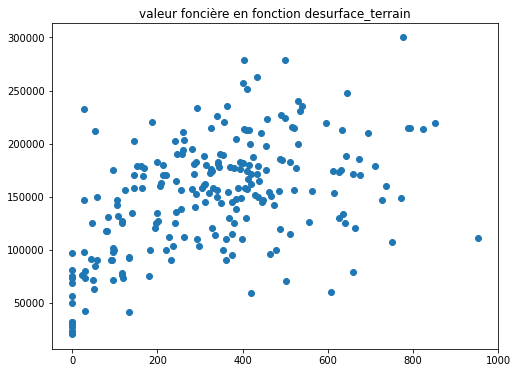

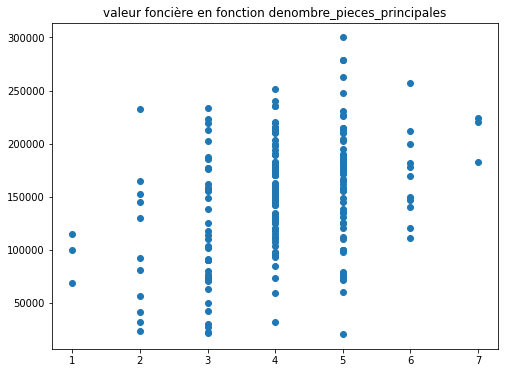

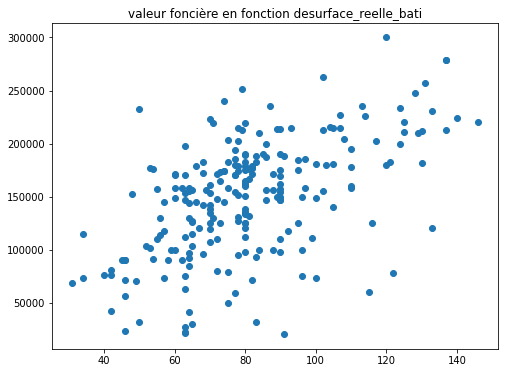

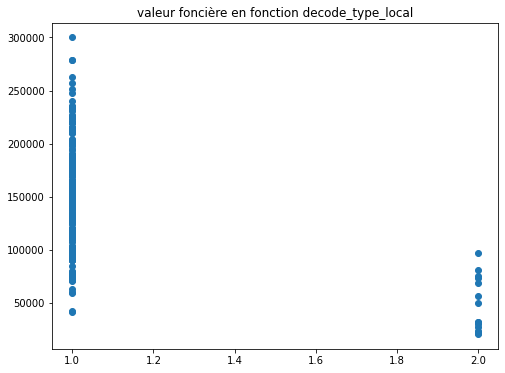

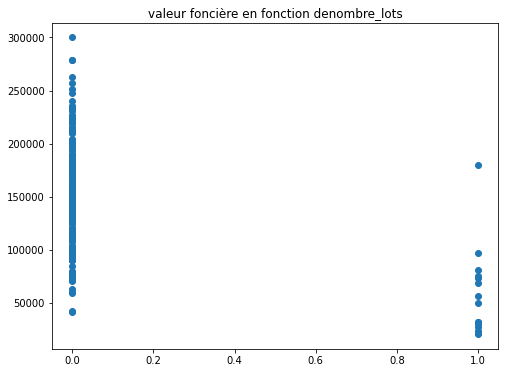

In [258]:
"""largest = df['surface_terrain'].nlargest(10)
df = df.drop(largest.index)
"""
col2 = ['surface_terrain', 'nombre_pieces_principales','surface_reelle_bati','code_type_local','nombre_lots']
for l in col2 :
    fig, ax = plt.subplots(figsize=(8,6))
    ax.scatter( df[[l]],df['valeur_fonciere'])
    plt.title('valeur foncière en fonction de' + l)
    plt.show()

La matrice de coorélation :

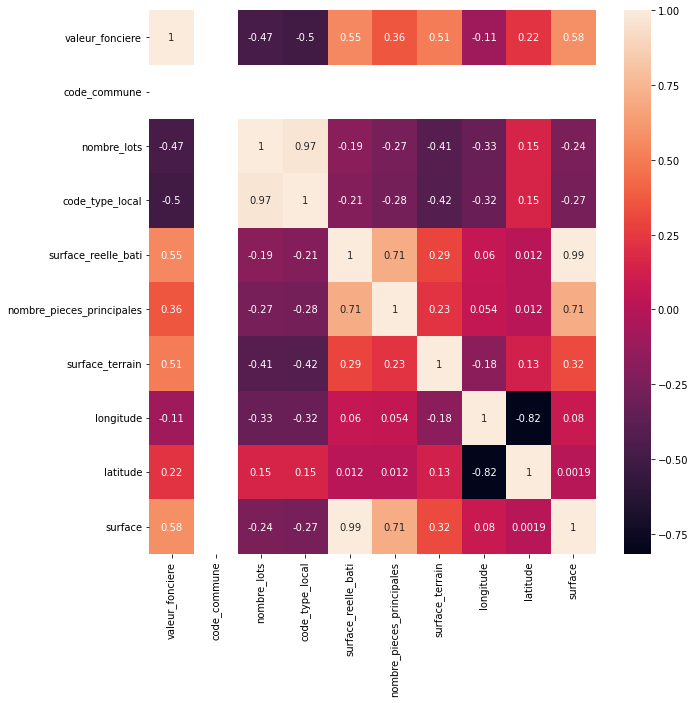

In [237]:
sns.heatmap(df.corr(), annot=True)
fig = plt.gcf()
fig.set_size_inches(10, 10)
plt.show()

# supprimer nombre_lots et code_commune

### Apprentissage :

In [240]:
df_train = df.sample(n=3000, random_state=7,replace=True)
df_train

,valeur_fonciere,code_commune,nombre_lots,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,surface_terrain,longitude,latitude,section_prefixe,surface
16,90000.0,76575,0,1,Maison,46.0,3.0,93.0,1.114486,49.372451,000AR,46.0
37,214000.0,76575,0,1,Maison,89.0,5.0,404.0,1.091406,49.387213,000BH,89.0
71,160400.0,76575,0,1,Maison,110.0,4.0,737.0,1.111311,49.377796,000AS,110.0
165,170000.0,76575,0,1,Maison,77.0,4.0,212.0,1.103322,49.388019,000BE,77.0
19,140000.0,76575,0,1,Maison,105.0,6.0,289.0,1.096795,49.370037,000BM,105.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19,41000.0,76575,0,1,Maison,64.0,2.0,134.0,1.106562,49.379214,000AX,64.0
17,103000.0,76575,0,1,Maison,65.0,4.0,236.0,1.105853,49.365540,000AO,65.0
62,76500.0,76575,0,1,Maison,42.0,3.0,22.0,1.107875,49.378954,000AY,42.0
55,120000.0,76575,0,1,Maison,67.0,4.0,329.0,1.103712,49.376641,000AT,67.0


In [241]:
X = pd.DataFrame(np.c_[df_train["surface"],df_train["nombre_pieces_principales"],df_train['code_type_local'],df_train['surface_terrain']], columns= ["surface","nombre_pieces_principales",'code_type_local',"surface_terrain"])
y = df_train["valeur_fonciere"]

In [242]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)

In [243]:
lmodellineaire = LinearRegression()
lmodellineaire.fit(X_train, y_train)

LinearRegression()

In [260]:
y_pred = lmodellineaire.predict(X_test)
rmse = round(np.sqrt(mean_squared_error(y_test, y_pred)),2)
r2 = round(r2_score(y_test, y_pred),4)

print(f"L'erreur quadratique moyenne est {rmse}€")
print(f"Taux de bonne classification {r2*100}%")

L'erreur quadratique moyenne est 34754.37€
Taux de bonne classification 57.85%


In [261]:
accuracy = lmodellineaire.score(X_test, y_test)
"Accuracy: {}%".format(int(round(accuracy * 100)))

'Accuracy: 58%'

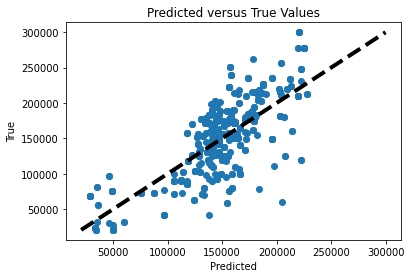

In [262]:
plt.scatter(y_pred, y_test)

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Predicted versus True Values')

plt.show()

In [263]:
surface = 103
nbpieces = 2
terrain = 0
code_local = 2
df_estim = [[surface,nbpieces,code_local,terrain]]

estimation = round(lmodellineaire.predict(df_estim)[0],2)
estimation

/home/hiba/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


109420.13

Lasso :

In [248]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.4, normalize=True)
lasso.fit(X_train,y_train)

/home/hiba/.local/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


Lasso(alpha=0.4, normalize=True)

In [265]:
y_pred_lasso = lasso.predict(X_test)
rmse_lasso = round(np.sqrt(mean_squared_error(y_test, y_pred_lasso)),2)
r2_lasso = round(r2_score(y_test, y_pred_lasso),4)

print(f"L'erreur quadratique moyenne est {rmse_lasso}€")
print(f"Taux de bonne classification {r2_lasso*100}%")
print('\n')

L'erreur quadratique moyenne est 34758.22€
Taux de bonne classification 57.84%




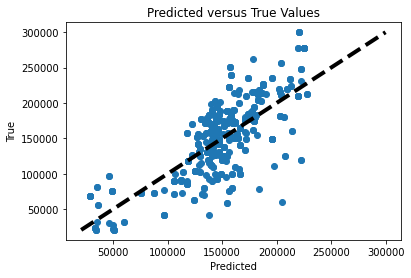

In [266]:
plt.scatter(y_pred_lasso, y_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Predicted versus True Values')
plt.show()